In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

# Prepare the Dataset

In [238]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [239]:
dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Self-Project/Wine/wine.csv')
dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [240]:
dataframe.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,good


In [241]:
dataframe.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                  object
dtype: object

In [242]:
N = len(dataframe)
row, col = dataframe.shape
col = col-1

for k in range(N):
    if dataframe.iloc[k,col] == 'good':
        dataframe.iloc[k,col] = 1
    else:
        dataframe.iloc[k,col] = 0

In [243]:
dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [244]:
dataframe["quality"] = pd.Series(dataframe['quality'], dtype='category')

<Axes: xlabel='quality', ylabel='count'>

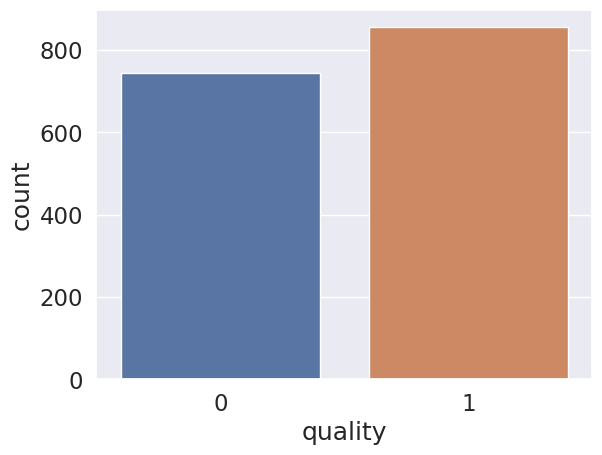

In [245]:
sns.countplot(x=dataframe['quality']) 

<Axes: xlabel='quality', ylabel='count'>

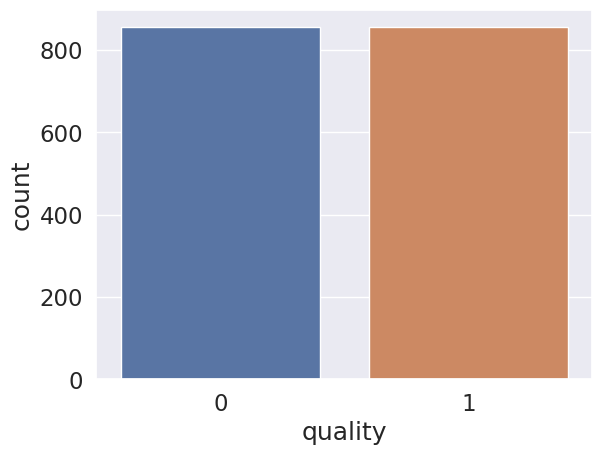

In [246]:
# Resampling using SMOTE
sm = SMOTE(random_state=42)
X = dataframe.iloc[:,:-1]
y = dataframe.iloc[:,-1]
X_bal, y_bal = sm.fit_resample(X,y)
sns.countplot(x=y_bal)

In [247]:
dataframe = pd.concat([X_bal, y_bal], axis=1)
dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,0
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,0
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,0
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,1
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1705,13.320589,0.526738,0.772059,4.702140,0.118369,23.000000,77.040775,1.001674,3.188155,0.763884,12.857287,0
1706,7.140911,0.393180,0.198637,1.881821,0.077500,28.227321,51.409107,0.996103,3.469545,0.615454,10.277268,0
1707,9.900000,0.638365,0.108692,4.173846,0.104902,32.322436,72.612178,0.999708,3.255186,0.658410,9.671026,0
1708,8.591706,0.492820,0.296801,2.003318,0.109801,19.099527,132.933649,0.997200,2.932488,1.955948,9.786730,0


In [248]:
dataframe.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<ipython-input-249-ad5418eee9f2>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataframe.corr(), annot = True)


<Axes: >

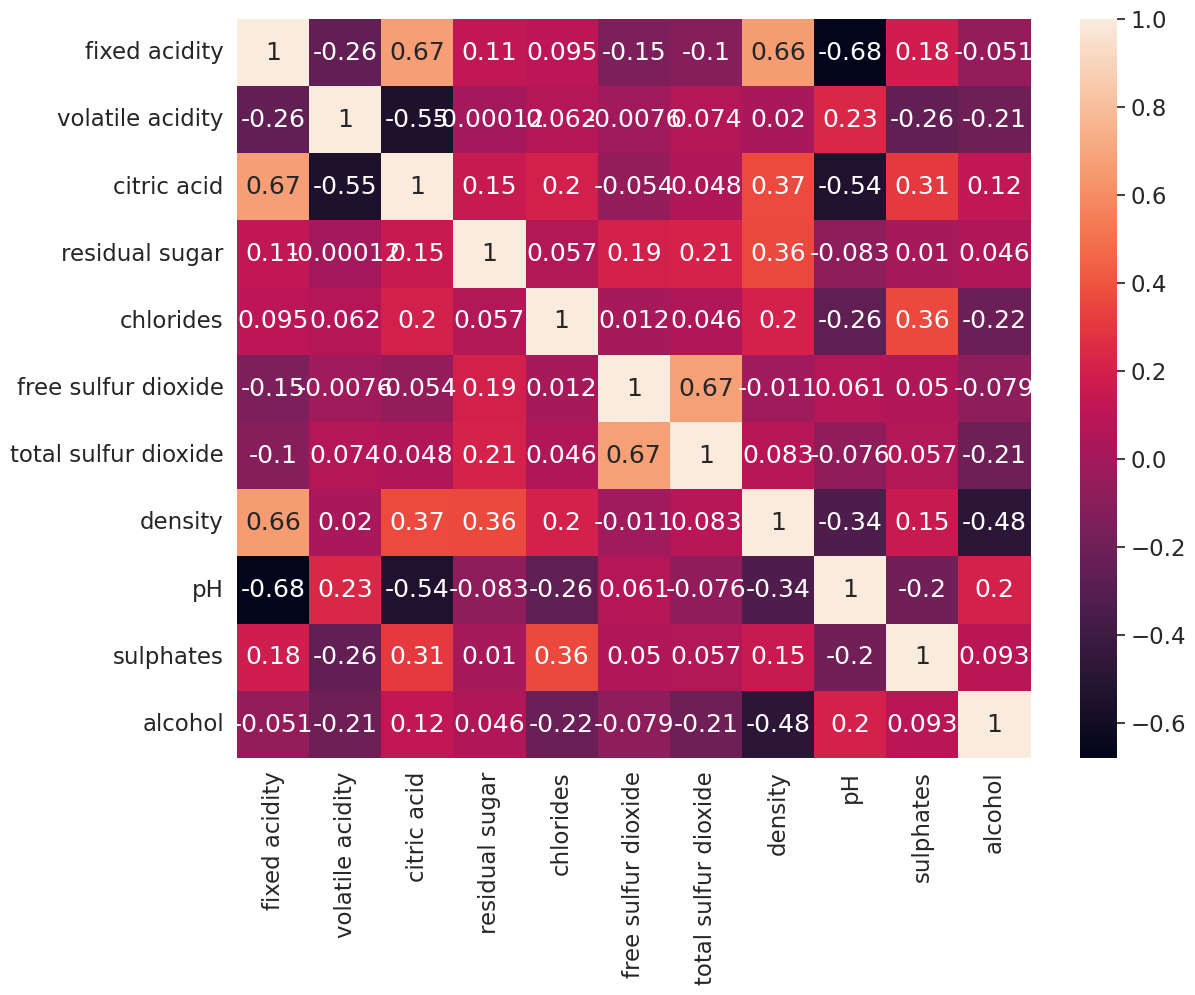

In [249]:
fig = plt.gcf()
figsize = fig.get_size_inches()
fig.set_size_inches(figsize*2)
sns.heatmap(dataframe.corr(), annot = True)

# Basic Supervised Learning

In [250]:
predictor = ['volatile acidity', 
             'citric acid', 
             'chlorides', 
             'total sulfur dioxide', 
             'density', 
             'sulphates', 
             'alcohol']
target = ['quality']

X = dataframe[predictor]
Y = dataframe[target]

In [269]:
Xtrain, Xtest, Ytrain, Ytest = tts(X, Y, test_size = 0.3, random_state = 13)
Ytrain = pd.to_numeric(Ytrain.iloc[:,0])
Ytest = pd.to_numeric(Ytest.iloc[:,0])
Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape

((1197, 7), (513, 7), (1197,), (513,))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75       254
           1       0.77      0.68      0.73       259

    accuracy                           0.74       513
   macro avg       0.74      0.74      0.74       513
weighted avg       0.74      0.74      0.74       513



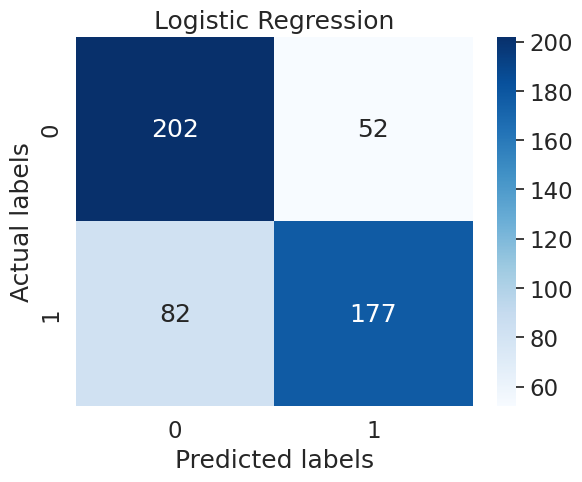

In [271]:
from sklearn.linear_model import LogisticRegression

regression_model = LogisticRegression(max_iter = 500)
regression_model.fit(Xtrain, Ytrain)
Ypred = regression_model.predict(Xtest)

cm = confusion_matrix(Ytest, Ypred)
fig, ax = plt.subplots()
sns.set(font_scale = 1.5) 
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Logistic Regression')

print(classification_report(Ytest, Ypred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       254
           1       0.75      0.76      0.76       259

    accuracy                           0.75       513
   macro avg       0.75      0.75      0.75       513
weighted avg       0.75      0.75      0.75       513



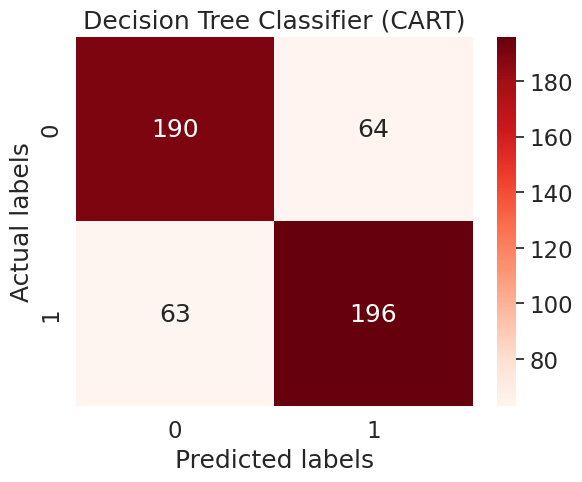

In [272]:
from sklearn import tree

DTC = tree.DecisionTreeClassifier().fit(Xtrain,Ytrain)
Ypred = DTC.predict(Xtest)

cm = confusion_matrix(Ytest, Ypred)
fig, ax = plt.subplots()
sns.set(font_scale = 1.5) 
sns.heatmap(cm, annot = True, cmap = 'Reds', fmt = 'g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Decision Tree Classifier (CART)')

print(classification_report(Ytest, Ypred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       254
           1       0.85      0.77      0.81       259

    accuracy                           0.81       513
   macro avg       0.82      0.82      0.81       513
weighted avg       0.82      0.81      0.81       513



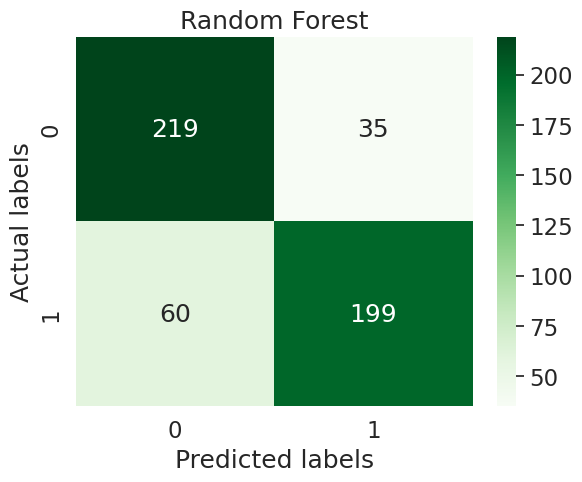

In [273]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators = 100).fit(Xtrain, Ytrain)
Ypred = RFC.predict(Xtest)

cm = confusion_matrix(Ytest, Ypred)
fig, ax = plt.subplots()
sns.set(font_scale = 1.5)
sns.heatmap(cm, annot = True, cmap = 'Greens', fmt = 'g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Random Forest')

print(classification_report(Ytest, Ypred))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74       254
           1       0.76      0.69      0.72       259

    accuracy                           0.73       513
   macro avg       0.73      0.73      0.73       513
weighted avg       0.73      0.73      0.73       513



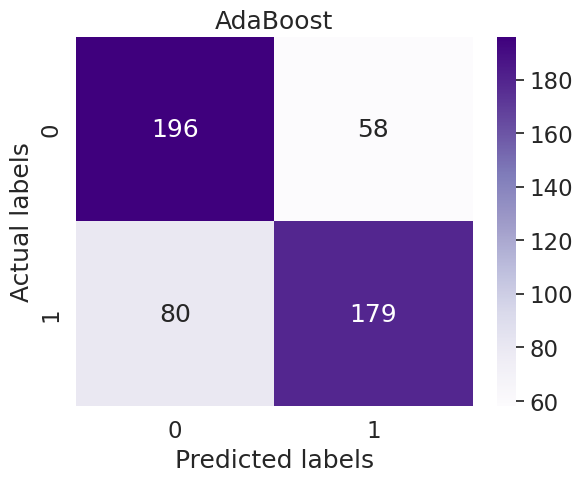

In [274]:
from sklearn.ensemble import AdaBoostClassifier

ABC = AdaBoostClassifier(n_estimators = 100).fit(Xtrain, Ytrain)
Ypred = ABC.predict(Xtest)

cm = confusion_matrix(Ytest, Ypred)
fig, ax = plt.subplots()
sns.set(font_scale = 1.5)
sns.heatmap(cm, annot = True, cmap = 'Purples', fmt = 'g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('AdaBoost')

print(classification_report(Ytest, Ypred))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78       254
           1       0.81      0.71      0.76       259

    accuracy                           0.77       513
   macro avg       0.77      0.77      0.77       513
weighted avg       0.77      0.77      0.77       513



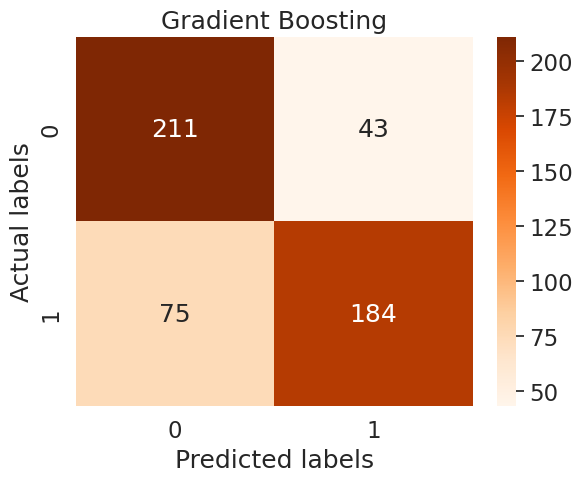

In [275]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(n_estimators = 100).fit(Xtrain, Ytrain)
Ypred = GBC.predict(Xtest)

cm = confusion_matrix(Ytest, Ypred)
fig, ax = plt.subplots()
sns.set(font_scale = 1.5)
sns.heatmap(cm, annot = True, cmap = 'Oranges', fmt = 'g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Gradient Boosting')

print(classification_report(Ytest, Ypred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       254
           1       0.82      0.75      0.78       259

    accuracy                           0.79       513
   macro avg       0.79      0.79      0.79       513
weighted avg       0.79      0.79      0.79       513



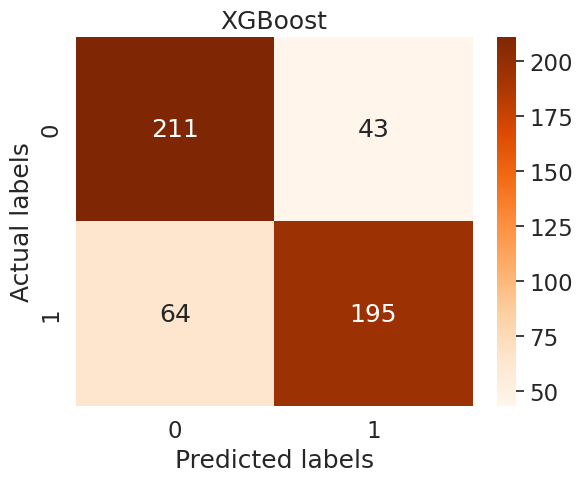

In [276]:
import xgboost

XGB = xgboost.XGBClassifier(n_estimators = 1000).fit(Xtrain,Ytrain)
Ypred = XGB.predict(Xtest)

cm = confusion_matrix(Ytest, Ypred)
fig, ax = plt.subplots()
sns.set(font_scale = 1.5)
sns.heatmap(cm, annot = True, cmap = 'Oranges', fmt = 'g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('XGBoost')

print(classification_report(Ytest, Ypred))

# Neural Network

In [277]:
dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [278]:
dataframe.shape

(1710, 12)

In [279]:
# Normalizing
def normalize(data):
  m, n = data.shape
  
  # Notes: The last column is the label or target
  name = data.columns[-1]
  label = data.iloc[:,-1]
  data = data.iloc[:,:-1]
  mean = np.mean(data, axis=0)
  std = np.std(data, axis=0)
  
  data = (data-mean)/std
  data[name] = label
  return(data)

In [280]:
# Train and Test Split
def train_test_split(data, train_size):
  n = len(data)
  train_size = int(n*train_size)

  shuffle_index = random.sample(range(n), n)
  train_index = shuffle_index[:train_size]
  test_index = shuffle_index[train_size:]

  data_train = data.loc[train_index]
  data_test = data.loc[test_index]

  # Convert to tensor
  train_data = tf.convert_to_tensor(data_train.iloc[:,:-1])
  train_label = tf.convert_to_tensor(data_train.iloc[:,-1])
  test_data = tf.convert_to_tensor(data_test.iloc[:,:-1])
  test_label = tf.convert_to_tensor(data_test.iloc[:,-1])
  return train_data, train_label, test_data, test_label

In [281]:
train_data, train_label, validation_data, validation_label = train_test_split(normalize(dataframe), 0.9)
print('Train data shape: ', train_data.shape)
print('Train label shape: ', train_label.shape)
print('Validation data shape: ', validation_data.shape)
print('Validation label shape: ', validation_label.shape)

Train data shape:  (1539, 11)
Train label shape:  (1539,)
Validation data shape:  (171, 11)
Validation label shape:  (171,)


In [282]:
# Create model
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.90):
      print(" =========> MODEL ACCURACY REACHED 90%, STOP TRAINING!")
      self.model.stop_training = True

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(None, train_data.shape[1])),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, None, 1024)        12288     
                                                                 
 dense_88 (Dense)            (None, None, 256)         262400    
                                                                 
 dense_89 (Dense)            (None, None, 64)          16448     
                                                                 
 dense_90 (Dense)            (None, None, 4)           260       
                                                                 
 dense_91 (Dense)            (None, None, 1)           5         
                                                                 
Total params: 291,401
Trainable params: 291,401
Non-trainable params: 0
_________________________________________________________________


In [283]:
epoch = model.fit(x=train_data, y=train_label, epochs=50, callbacks=[myCallback()], validation_data=(validation_data, validation_label))

Epoch 1/50
49/49 [==============================] - 2s 18ms/step - loss: 0.5430 - accuracy: 0.7258 - val_loss: 0.5845 - val_accuracy: 0.6784
Epoch 2/50
49/49 [==============================] - 1s 15ms/step - loss: 0.4888 - accuracy: 0.7706 - val_loss: 0.5517 - val_accuracy: 0.7135
Epoch 3/50
49/49 [==============================] - 1s 14ms/step - loss: 0.4773 - accuracy: 0.7739 - val_loss: 0.5514 - val_accuracy: 0.6959
Epoch 4/50
49/49 [==============================] - 1s 14ms/step - loss: 0.4624 - accuracy: 0.7862 - val_loss: 0.5798 - val_accuracy: 0.7018
Epoch 5/50
49/49 [==============================] - 1s 14ms/step - loss: 0.4660 - accuracy: 0.7849 - val_loss: 0.5426 - val_accuracy: 0.7076
Epoch 6/50
49/49 [==============================] - 1s 13ms/step - loss: 0.4435 - accuracy: 0.7934 - val_loss: 0.5530 - val_accuracy: 0.7427
Epoch 7/50
49/49 [==============================] - 1s 22ms/step - loss: 0.4443 - accuracy: 0.7979 - val_loss: 0.5258 - val_accuracy: 0.7251
Epoch 8/50
49

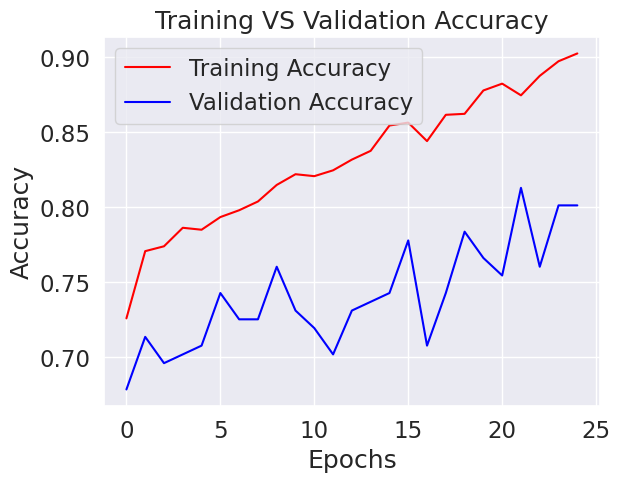

In [284]:
loss = epoch.history['loss']
acc = epoch.history['accuracy']
val_loss = epoch.history['val_loss']
val_acc = epoch.history['val_accuracy']


number_epochs=range(len(acc))

plt.plot(number_epochs, acc, 'red')
plt.plot(number_epochs, val_acc, 'blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training VS Validation Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

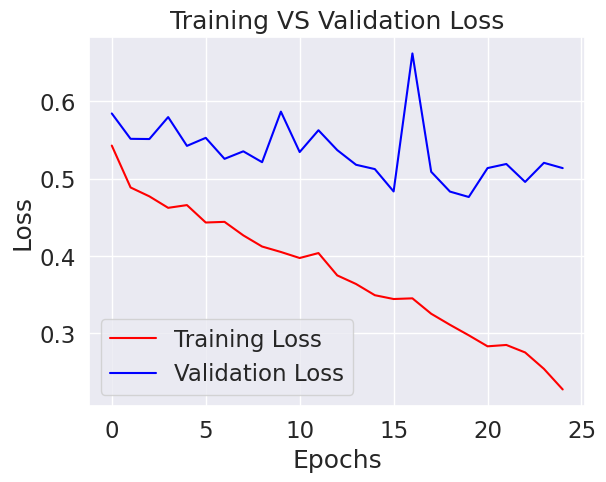

In [285]:
plt.plot(number_epochs, loss, 'red')
plt.plot(number_epochs, val_loss, 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training VS Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()